In [102]:
%%time

import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

import logging
import warnings

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
warnings.filterwarnings("ignore")
    
df = pd.read_excel('LW Raw.xlsx')

CPU times: user 1min 5s, sys: 1.51 s, total: 1min 6s
Wall time: 1min 9s


In [103]:
data = df.copy()

data['GGR'] = data['GGR Real EUR'] + data['GGR Bonus EUR']

In [104]:
final_dataframes = []

# Taking all availiable dates
dates = np.sort(data['Date'].unique())

# Iterating through each date
for date in dates:

    # Filtering out dataframe by particular date
    daily_df = data[data['Date'] == date].copy()

    # Creating 2 groups to identify outliers (2.5% from each side)
    daily_df['lower'] = np.where(daily_df['GGR'] < (np.quantile(daily_df['GGR'], 0.025)), 1, 0)
    daily_df['upper'] = np.where(daily_df['GGR'] > (np.quantile(daily_df['GGR'], 0.975)), 1, 0)

    # Removing Outliers (users in groups lower and upper)
    daily_outliers = daily_df[(daily_df['lower']==0) & (daily_df['upper']==0)]

    # Calculating mean, sts, and border for each day
    outliers_mean = daily_outliers['GGR'].mean()
    outliers_std = daily_outliers['GGR'].std()
    outliers_border = outliers_mean + outliers_std * 0.5

    # Removing users with daily total GGR value greater than the border value
    # daily_final = daily_df[daily_df['GGR'] < outliers_border]
    daily_final = daily_outliers
    daily_final = daily_final.drop('upper', axis=1)
    daily_final['Date'] = date
    daily_final['mean'] = outliers_mean

    # Append modified daily data to the dataframe
    final_dataframes.append(daily_final)

# Concatenating all results into one dataframe
result = pd.concat(final_dataframes)
result = result[['Date', 'Account ID', 'GGR', 'VIP level', 'mean', 'lower']]

2023-07-07 15:03:02,365 - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
2023-07-07 15:03:10,438 - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


CPU times: user 52.8 s, sys: 651 ms, total: 53.4 s
Wall time: 1min 8s


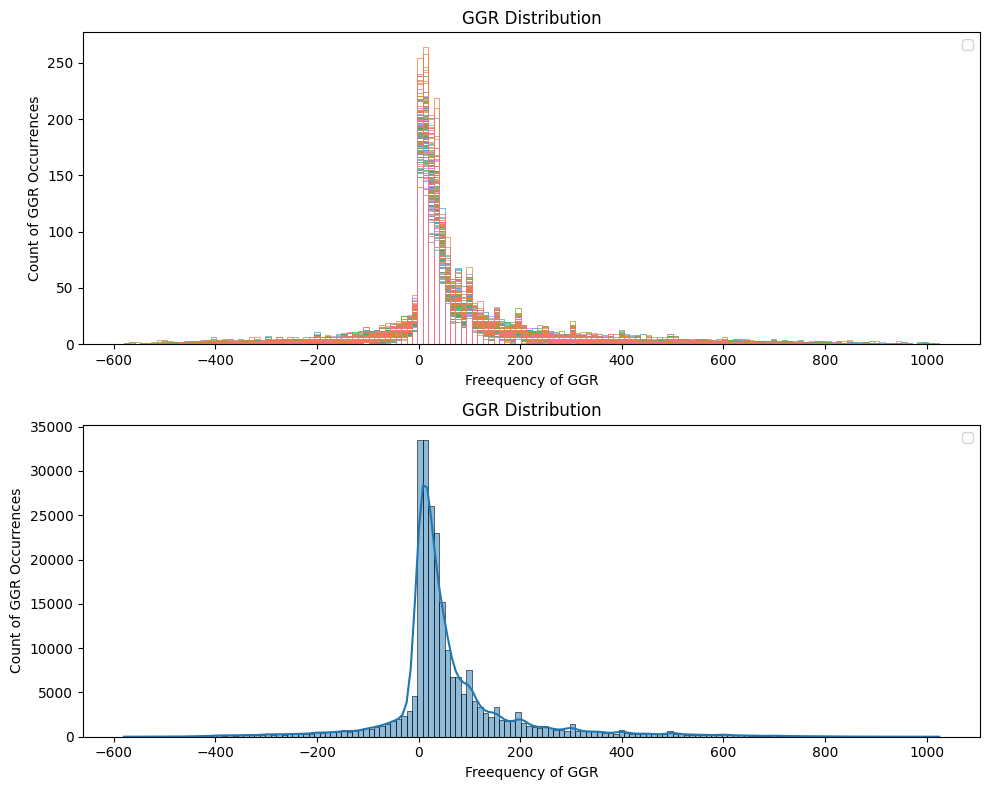

In [105]:
%%time

fig = plt.figure()
fig.set_size_inches(10, 8)

fig.add_subplot(2, 1, 1)
sns.histplot(data=result, x='GGR', bins=150, hue='Date', fill=False)

plt.xlabel('Freequency of GGR')
plt.ylabel('Count of GGR Occurrences')
plt.title('GGR Distribution')

plt.legend()
plt.tight_layout()



fig.add_subplot(2, 1, 2)
sns.histplot(data=result, x='GGR', bins=150, kde=True)

plt.xlabel('Freequency of GGR')
plt.ylabel('Count of GGR Occurrences')
plt.title('GGR Distribution')

plt.legend()
plt.tight_layout()